In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# define image transformations
tranform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=tranform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True, num_workers=2)

Files already downloaded and verified


In [6]:
# define classes
classes = ('plane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [20]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

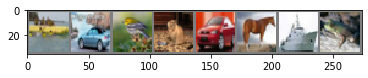

In [22]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [52]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [53]:
cnn = CNN()

crit = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

In [54]:
for ep in range(2):
    
    run_loss = 0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = crit(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        run_loss += loss.item()
        if i % 1999 == 0 and i != 1:
            print("epoch no ", ep+1, "; iteration no ", i+1, "; loss is ", run_loss/2000 )
            run_loss = 0

epoch no  1 ; iteration no  1 ; loss is  0.0011459466218948365
epoch no  1 ; iteration no  2000 ; loss is  2.175689223587513
epoch no  1 ; iteration no  3999 ; loss is  1.788716200262308
epoch no  1 ; iteration no  5998 ; loss is  1.6044107209444045
epoch no  2 ; iteration no  1 ; loss is  0.0007714147567749023
epoch no  2 ; iteration no  2000 ; loss is  1.4797794595062732
epoch no  2 ; iteration no  3999 ; loss is  1.404836295157671
epoch no  2 ; iteration no  5998 ; loss is  1.339801296904683


In [59]:
dataiter = iter(test_loader)

In [60]:
images, labels = dataiter.next()


AttributeError: 'list' object has no attribute 'next'

In [1]:
imshow(torchvision.utils.make_grid(images))
print('truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

NameError: name 'imshow' is not defined